### Learning Objectives 
At the end of this course, you should be able to:
1. Define multivariate and bivariate analysis
2. Describe association analysis
3. Select associations between variables for analysis based on scatter plot
4. Determine the covariance between two variables
5. Define correlation
6. Determine the correlation between two variables
7. Distinguish between Pearson, Spearman and Kendall correlation coefficients
8. Test the association between two categorical variables using the Chi-squared test
9. Explain market basket analysis
10. Find association rules in market basket analysis using support, confidence and lift
11. Determine association rules using Apriori algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Multivariate Analysis

The design team at ABCarz Inc. is trying to come up with a new design for their upcoming automobile. Before the design begins, they collected data about various automobiles to understand what parameters in a car are likely to influence its turning radius, mileage and type like sports, van.

Data about price, mileage, drive-train-type, engine-size, horsepower, fuel-tank-capacity, length, width, wheel-base etc. of about 90 cars is collected for this analysis.

In [2]:
df = pd.read_csv("Cars93.csv").drop(columns='Unnamed: 0')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Cars were selected at random from among 1993 passenger car models that were listed in both the "Consumer Reports" issue and the "PACE Buying Guide". Pickup trucks and Sport/Utility vehicles were eliminated due to incomplete information in the Consumer Reports source. Duplicate models (e.g., Dodge Shadow and Plymouth Sundance) were listed at most once.

The Cars93 data frame has 93 rows and 27 columns. The details of the 27 columns are as follows:

Manufacturer: Manufacturer of the car such as Audi, BMW, Cadillac, Chevrolet etc.

Model: Model of the car such as Corvette (Chevrolet), 535i (BMW) etc.

Type: Indicates the type of the car. Is a factor with levels "Small", "Sporty", "Compact", "Midsize", "Large" and "Van"

Min.Price: Minimum Price (in $1,000): price for a basic version of the car.

Price: Midrange Price (in $1,000): average of Min.Price and Max.Price.

Max.Price: Maximum Price (in $1,000): price for "a premium version" of the car.

MPG.city: City MPG (miles per US gallon by EPA rating).

MPG.highway: Highway MPG (miles per US gallon by EPA rating).

AirBags: Is a factor with levels "none", "driver only", and "driver & passenger".

DriveTrain: Indicates the drive train type of the car. Is a factor with levels: rear wheel, front wheel and 4WD.

Cylinders: Number of cylinders in the engine.

EngineSize: Size of the engine (litres).

Horsepower: Maximum horsepower of the car.

RPM: Revolutions per minute (RPM) at maximum horsepower.

Rev.per.mile: Engine revolutions per mile (in highest gear).

Man.trans.avail: Indicates if a manual transmission version is available. Is a factor with level yes or no.

Fuel.tank.capacity: Fuel tank capacity (US gallons).

Passengers: Passenger capacity (persons)

Length: Length of the car (inches).

Wheelbase: Wheelbase (inches).

Width: Width of the car (inches).

Turn.circle: U-turn space (feet).

Rear.seat.room: Rear seat room (inches)

Luggage.room: Luggage capacity (cubic feet).

Weight: Weight of the car (pounds).

Origin: Indicates the origin of the manufacturer. Is a factor with levels non-USA or USA.

Make: Combination of Manufacturer and Model.

***

#### Exploring the data set

This is a multivariate data as it has multiple parameters such as price, mileage, drive train type, engine size, horsepower, fuel tank capacity, length, width, and wheelbase.

The given dataset contains both categorical and numeric parameters. Type, DriveTrain, AirBags, Cylinders, Man.trans.avail and Origin are some of the categorical parameters whereas Length, Width, Wheelbase, Turn.cirlce, EngineSize, Horsepower, RPM, and MPG.city are some of the numerical parameters available.

Recall that parameters in a data set can be considered as variables which can be dependent or independent in nature. A variable is said to be dependent if its value changes based on another variable.

***

#### Parameters of interest
The design team has a high interest in analyzing parameters that are likely to influence the mileage of a car, its turn circle and its type. Considering the above viewpoint let us eliminate the following parameters.

1. Manufacturer, Model, Make: Analysis is being done independently of the manufacturer, model and make.
2. Min.Price, Max.Price, Price: Analysis is being done independently of the price of a car
3. MPG.Highway: MPG.city and MPG.Highway are seen to follow a similar trend for a car. Hence only one of these are being considered i.e. MPG.city.
4. No. of passengers, rear seat room, luggage room, origin, manual transmission availability.

After eliminating the above said 12 parameters from the data set, the remaining 15 parameters are being considered for further study.


In [3]:
cars93reduced = df[["Type","MPG.city","AirBags","DriveTrain","Cylinders","EngineSize","Horsepower","RPM","Rev.per.mile",
                    "Fuel.tank.capacity","Length","Wheelbase","Width","Turn.circle","Weight"]]

Of these 15 parameters, 12 are numeric and 3 are categorical. Few rows of this data are shown below.

In [4]:
cars93reduced.head()

,Type,MPG.city,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Weight
0,Small,25,None,Front,4,1.8,140,6300,2890,13.2,177,102,68,37,2705
1,Midsize,18,Driver & Passenger,Front,6,3.2,200,5500,2335,18.0,195,115,71,38,3560
2,Compact,20,Driver only,Front,6,2.8,172,5500,2280,16.9,180,102,67,37,3375
3,Midsize,19,Driver & Passenger,Front,6,2.8,172,5500,2535,21.1,193,106,70,37,3405
4,Midsize,22,Driver only,Rear,4,3.5,208,5700,2545,21.1,186,109,69,39,3640


In [5]:
cars93reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                93 non-null     object 
 1   MPG.city            93 non-null     int64  
 2   AirBags             93 non-null     object 
 3   DriveTrain          93 non-null     object 
 4   Cylinders           93 non-null     object 
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     int64  
 7   RPM                 93 non-null     int64  
 8   Rev.per.mile        93 non-null     int64  
 9   Fuel.tank.capacity  93 non-null     float64
 10  Length              93 non-null     int64  
 11  Wheelbase           93 non-null     int64  
 12  Width               93 non-null     int64  
 13  Turn.circle         93 non-null     int64  
 14  Weight              93 non-null     int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 11.0+ KB


The analysis of the given dataset is multivariate analysis since it takes multiple variables into consideration.

***

# Association analysis

Association analysis or Association rule learning is a method for discovering interesting associations between variables in datasets. Association analysis deals with finding the degree and direction of the relationship between two variables. The __degree/strength__ indicates the magnitude with which two variables may be associated. The __direction__ indicates if the association between them is directly or inversely proportional.

Consider an outcome variable y and predictor variable x, the relationship between y and x can be represented as y=f(x). If y and x have a linear relationship, then f(x) may be represented as ax+b and thus y=ax+b.

For a variable y which can be predicted based on x, it can be said that a change in x influences y, whereas it cannot be guaranteed that a change in y indicates a change in x. For example, if rainfall is high there may be a greater sale of umbrellas, but having a greater sale of umbrellas need not indicate higher rainfall.

In the given sample dataset, if the turn-circle of a car can be influenced by its length, then turn-circle is said to be the outcome whereas length is said to be the predictor variable.

To find out whether length influences the turn-circle of a car, we study the association between these variables. Such study is termed Association analysis. There are two types of analysis __multivariate and bivariate__.

> __Multivariate analysis__ is the statistical process of simultaneously analyzing multiple variables. When only two variables are being analyzed then such analysis is termed as __bivariate analysis__.

The variables being analyzed may either be dependent or independent in nature. A dependent variable can be called outcome or criterion, while the variable(s) on which it depends can be called predictor(s). In bivariate analysis, there is one predictor and one outcome variable.


### Scatter Plot

A scatter plot can be used to get an insight into the nature of the relationship between two numeric variables. 

Using a scatter plot, one can visually determine whether there exists a linear association between the two variables. The scatter plot matrix of the chosen numeric variables of the given data set is shown below. Let us see an example of MPG.city plotting with other columns except MPG.city in our cars93reduced.

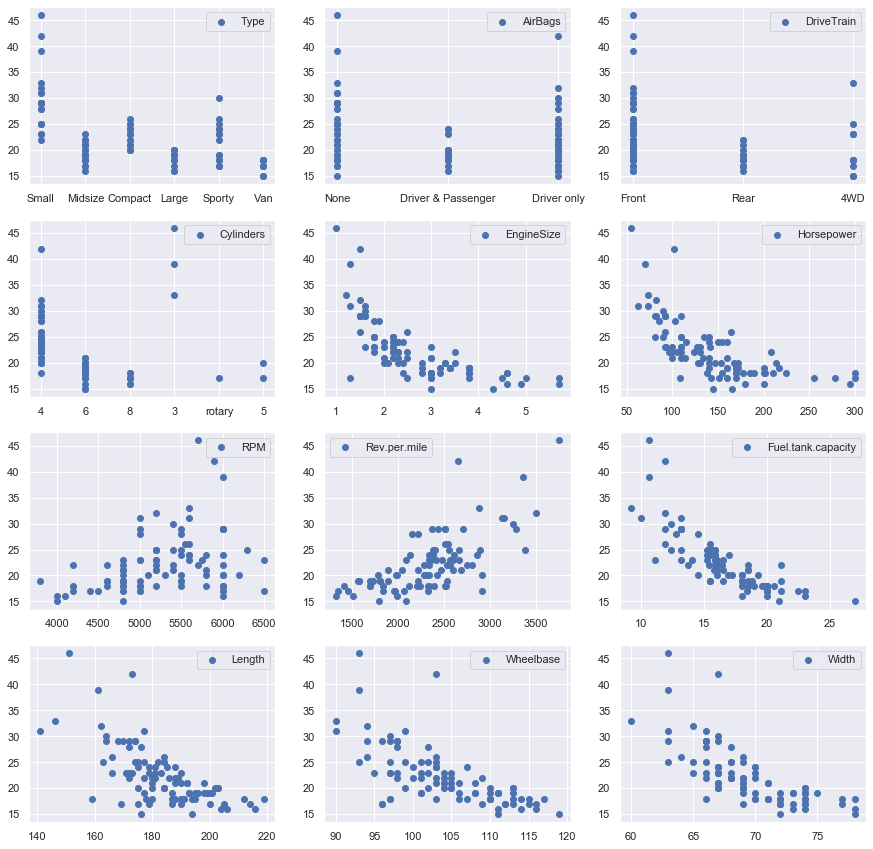

In [6]:
import matplotlib.pyplot as plt
selcols = ["Type","AirBags","DriveTrain","Cylinders","EngineSize","Horsepower","RPM","Rev.per.mile","Fuel.tank.capacity",
           "Length","Wheelbase","Width","Turn.circle","Weight"]
fig, ax = plt.subplots(4, 3,squeeze=False,figsize=(15,15))
count = 0
for i in range(4):
    for j in range(3):
        ax[i, j].scatter(cars93reduced[selcols[count]],cars93reduced["MPG.city"],label=selcols[count])
        ax[i, j].legend()
        count+=1


While performing association analysis, one might consider a subset of all possible associations between variables in a dataset because all the associations may not give insight into which feature may be important in that dataset. 

Using the previous scatter plot matrix, some of the relationships can be eliminated from further analysis. For example, there might be relationships between RPM and MPG.city, RPM and Wheelbase, RPM and Horsepower, Horsepower and Wheelbase, etc. as shown below.

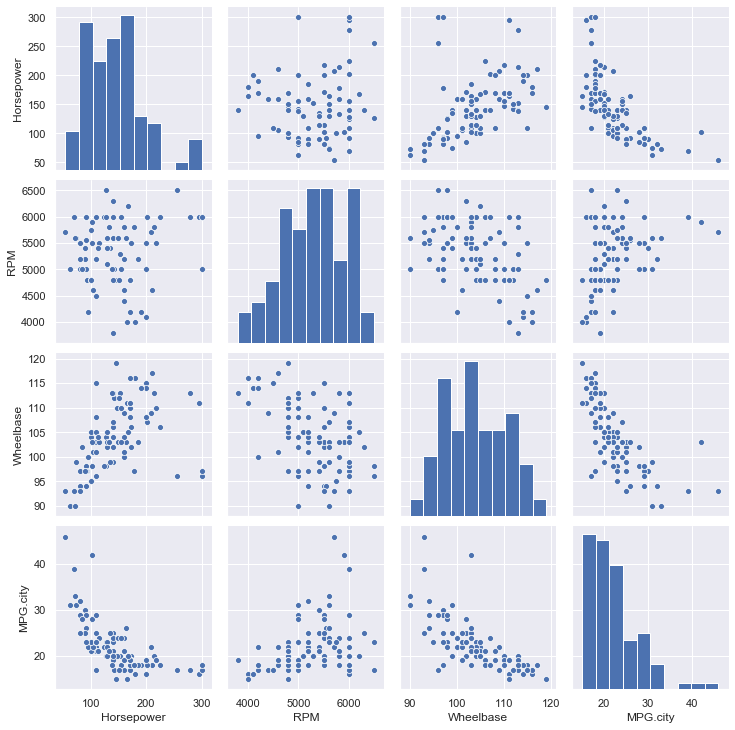

In [7]:
sns.pairplot(cars93reduced, vars=["Horsepower","RPM","Wheelbase","MPG.city"]);

However, the association between __RPM and MPG.City__, __Horsepower and Wheelbase__ looks interesting as compared to others as it suggests a linear relationship. Therefore, one might choose these associations (RPM and MPG.city, Horsepower and Wheelbase) for further analysis.

### Applications of association analysis

Some scenarios where association analysis is being used are:

1. Credit card purchases can provide insight into the type of products a customer is likely to purchase. Using the credit card statements, one can determine if the customer spends more on household items/ jewellery etc.

2. Supermarkets can rearrange their shelves by understanding the combinations of frequently bought items. For example, if the supermarket observes that bread and butter are frequently purchased together, then the supermarket may choose to place these items close to each other.

3. Telecommunication agencies can structure product bundles based on commonly associated options (internet packs, SMS services and other value added services) to maximize revenue.

4. Click stream analysis on websites is used to observe patterns in user’s browsing behavior in order to deliver content accordingly. For example, the click stream analysis may suggest that visitors who land on a webpage X, clicked on links A, B and C more often than on links D,E and F. Such observations provide an insight on how to personalize and recommend the content to website visitors.

***

## Finding associations

The design team wants to figure out which parameters of the data may be related. They speculate that the following associations are possible.

1. MPG.City and EngineSize
2. MPG.City and Horsepower
3. MPG.City and RPM
4. EngineSize and Horsepower
5. RPM and Horsepower
6. Length and Wheelbase
7. Length and Turn.Circle
8. Wheelbase and Turn.Circle
9. DriveTrain and Type
10. Type and AirBags
11. DriveTrain and MPG.City
12. Horsepower and Type

In the given data set, DriveTrain, Type and AirBags are categorical variables, whereas MPG.City, Horsepower, RPM, Turn.circle, Length, Wheelbase and EngineSize are numeric variables as shown below.

> Associations 1 to 8 suggests the association between two numeric variables, 9 and 10 suggest an association between two categorical variables whereas 11 and 12 suggest an association between a numeric and a categorical variable.

In [8]:
columns = ["MPG.city","EngineSize","Horsepower","RPM","Length","Wheelbase","Turn.circle","DriveTrain","Type","AirBags"]
cars93reduced[columns].head(10)

,MPG.city,EngineSize,Horsepower,RPM,Length,Wheelbase,Turn.circle,DriveTrain,Type,AirBags
0,25,1.8,140,6300,177,102,37,Front,Small,None
1,18,3.2,200,5500,195,115,38,Front,Midsize,Driver & Passenger
2,20,2.8,172,5500,180,102,37,Front,Compact,Driver only
3,19,2.8,172,5500,193,106,37,Front,Midsize,Driver & Passenger
4,22,3.5,208,5700,186,109,39,Rear,Midsize,Driver only
5,22,2.2,110,5200,189,105,41,Front,Midsize,Driver only
6,19,3.8,170,4800,200,111,42,Front,Large,Driver only
7,16,5.7,180,4000,216,116,45,Rear,Large,Driver only
8,19,3.8,170,4800,198,108,41,Front,Midsize,Driver only
9,16,4.9,200,4100,206,114,43,Front,Large,Driver only


Recall that to find out if the association between two numeric variables may be linear, a scatter plot is drawn. The scatter plot matrix for associations 1 to 5 comprising variables MPG.city, EngineSize, Horsepower and RPM is shown below.

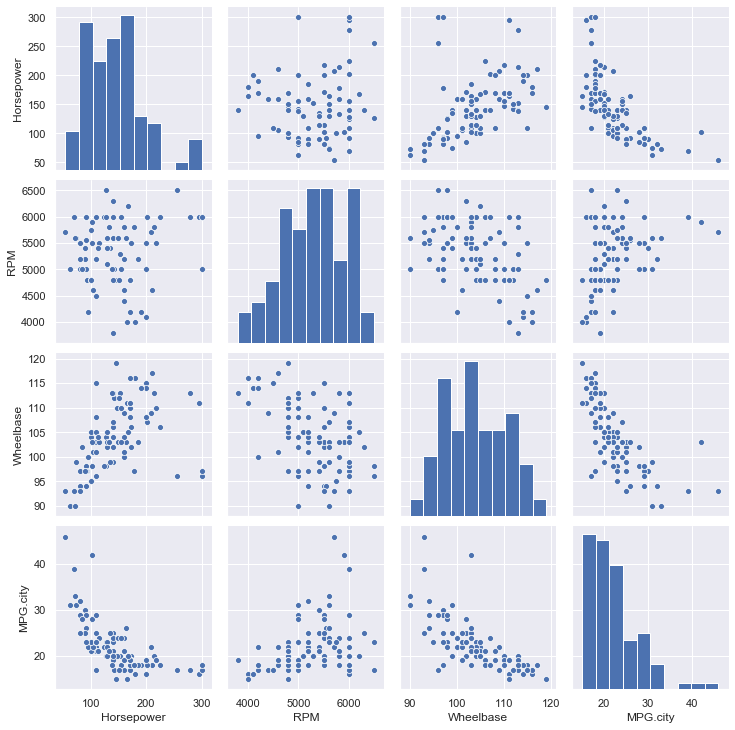

In [9]:
sns.pairplot(cars93reduced, vars=["Horsepower","RPM","Wheelbase","MPG.city"]);

The following associations seem to be linear based on the scatter plot:
1. MPG.city and EngineSize
2. MPG.city and Horsepower
3. MPG.city and RPM
4. EngineSize and Horsepower

Similarly, the scatter plot matrix for associations 6 to 8 comprising variables Length, Wheelbase and Turn.cirlce shown below indicates possible linear associations between
1. Length and Wheelbase
2. Length and Turn.circle
3. Wheelbase and Turn.circle

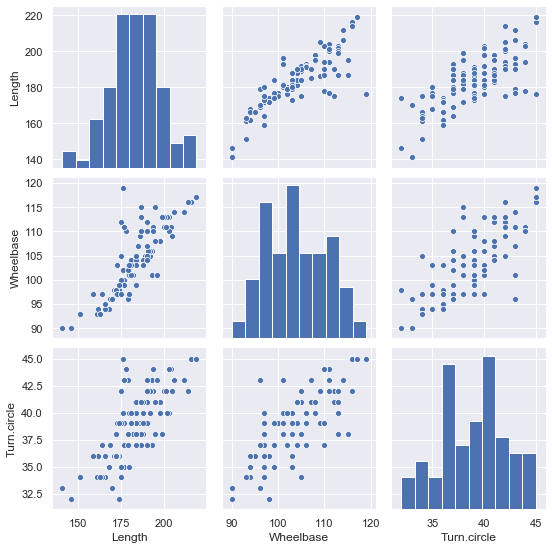

In [10]:
sns.pairplot(cars93reduced, vars=["Length","Wheelbase","Turn.circle"]);

Based on the observations from the scatter plots, the following associations are selected for further analysis:

1. MPG.city and EngineSize
2. MPG.city and Horsepower
3. MPG.city and RPM
4. EngineSize and Horsepower
5. Length and Wheelbase
6. Length and Turn.circle
7. Wheelbase and Turn.circle

***

## Covariance

Given that there are linear associations between MPG.city and Horsepower, MPG.city and RPM, and MPG.city and EngineSize, the design team at ABCarz wants to understand the degree and direction of these associations.

> __Covariance is a measure of how much two random variables change together. It helps measure the direction and strength (degree) of the linear association between a pair of numeric variables.__

![](1.PNG)

Covariance helps to understand the association between the variables X and Y. It helps to notice the effect of the change in the value of X on Y, i.e. if the value of X increases, does the value of Y increase or decrease.

__If the covariance value is positive, it indicates that while observing an increase in the value of X, the value of Y is likely to increase (directly proportional). Similarly, if the covariance value is negative, it indicates that while observing a decrease in the value of X, the value of Y is likely to increase (inversely proportional).__

While covariance helps determine the direction of the association, its magnitude/strength is not easy to interpret.

> In Python, the covariance of X and Y can be calculated using `X.cov(Y)` Here X and Y are Data frame objects.

Covariance of MPG.city and EngineSize can be computed as follows.

![](2.PNG)

Here, mean(MPG.city) = 22.36559 and mean(EngineSize) = 2.667741



In [11]:
sum((cars93reduced["MPG.city"] - cars93reduced["MPG.city"].mean()) * 
    (cars93reduced["EngineSize"] - (cars93reduced["EngineSize"].mean()))/(cars93reduced.shape[0]-1))

-4.139165497896213

In [12]:
cars93reduced["EngineSize"].cov(cars93reduced["MPG.city"])

-4.139165497896213

The obtained covariance value (-4.13916) indicates that the direction of covariance is negative and its degree/magnitude is 4.13916. 

The covariance of all the speculated relationships is as shown below:

In [13]:
cars93reduced["Horsepower"].cov(cars93reduced["MPG.city"])

-197.9798971482001

In [14]:
cars93reduced["RPM"].cov(cars93reduced["MPG.city"])

1217.4789621318369

In [15]:
cars93reduced["EngineSize"].cov(cars93reduced["Horsepower"])

39.776998597475455

In [16]:
cars93reduced["Length"].cov(cars93reduced["Wheelbase"])

82.02197288452543

In [17]:
cars93reduced["Length"].cov(cars93reduced["Turn.circle"])

34.780621785881266

In [18]:
cars93reduced["Wheelbase"].cov(cars93reduced["Turn.circle"])

15.899836372136514

Here it is observed that:

1. There is a negative association between:
    - MPG.city and EngineSize
    - MPG.city and Horsepower
    
2. There is a positive association between:
    - MPG.city and RPM
    - EngineSize and Horsepower
    - Length and Wheelbase
    - Length and Turn.circle
    - Wheelbase and Turn.circle
    
This indicates that MPG.city is inversely proportional to EngineSize, inversely proportional to Horsepower, and directly proportional to RPM in the given sample dataset.

Similarly, Turn.circle is directly proportional to Wheelbase and directly proportional to Length in this sample dataset.

## Covariance matrix

The covariance matrix captures the values of covariance between selected parameters of the data set. The covariance matrix of parameters - MPG.city, EngineSize, Horsepower and RPM in the given dataset is as shown below.

In [19]:
cars93reduced[["MPG.city","EngineSize","Horsepower","RPM"]].cov()

,MPG.city,EngineSize,Horsepower,RPM
MPG.city,31.582281,-4.139165,-197.979897,1217.478962
EngineSize,-4.139165,1.076122,39.776999,-339.163745
Horsepower,-197.979897,39.776999,2743.078775,1146.633941
RPM,1217.478962,-339.163745,1146.633941,356088.709677


## Exercise:
1. Use the iris dataset to determine the possible linear associations based on scatter plot and covariance values.
2. Form the covariance matrix by considering all possible associations between parameters of the trees dataset. Answer the following questions based on the obtained covariance matrix. Is the obtained matrix symmetric? Is the obtained matrix positive definite? 

***
# Correlation

Correlation is a measure of the strength and direction of the linear association between two quantitative variables.

Correlation is normalized covariance and is generally obtained by dividing the covariance by the product of standard deviation of the variables

![](3.PNG)

Owing to normalization, correlation always lies in the range of [-1, +1].
- The correlation of a sample is represented using r and that of a population is represented using ρ (rho).
- The sign of correlation indicates the direction of the association, as expressed below:
    - positive association: r or ρ > 0
    - negative association: r or ρ < 0
    - no linear association: r or ρ ≈ 0

> The closer r (or ρ) is to ±1, the stronger the linear association. If the correlation is closer to 0, then the variables might be statistically independent.

Correlation is computed using corr method of the pandas library.

## Types of correlation

Based on the type of variable, the nature of its distribution and the monotonicity of the association, the appropriate correlation has to be used. Commonly used correlations are __Pearson__, __Spearman__ and __Kendall__.

An association between two variables y and x where y=f(x) is said to be monotonic if and only if the value of y is either entirely increasing or decreasing as x increases.

The following graphs distinguish between monotonic and non-monotonic associations.

![](4.PNG)

The following table summarizes the correlation that can be used based on the type of variable, nature of distribution of variable and monotonicity of the association.

![](5.PNG)

### Pearson correlation
Pearson correlation coefficient is used on numeric variables pulled out of a population that is normally distributed. These numeric variables have to be of the interval or ratio scale.

It is defined as 

![](6.PNG)

[Shapiro wilk test on normality](https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/): The Shapiro–Wilk test tests the null hypothesis that a sample x1, ..., xn came from a normally distributed population.

__Null Hypothesis $H_0$__: The population from which the sample has been taken is normally distributed.

__Alternate Hypothesis $H_a$__:  The population from which the sample has been taken is  __not__normally distributed.


> if the p value is greater than the chosen alpha level(0.05), then the null hypothesis that the data came from a normally distributed population can not be rejected

The Shapiro-Wilk test on Turn.circle, Length and Wheelbase in the given data set for a significance level of 0.05 is shown below.

[Python scipy Shapiro wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html): returns `(W, p-value)`.

In [20]:
from scipy.stats import shapiro
shapiro(cars93reduced["Turn.circle"])

(0.9762530326843262, 0.08784385770559311)

The p-value obtained from the Shapiro-Wilk test suggests that the underlying population could be normally distributed (p-value > chosen significance level).

#### QQplot
QQplot can also be used to determine if the underlying data is normally distributed. The QQ plot of Turn.circle, Length and Wheelbase is as shown below.

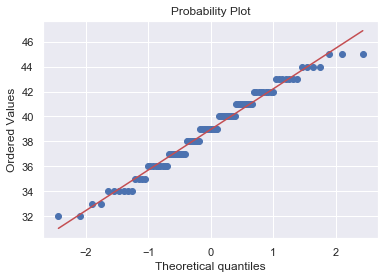

In [21]:
import scipy.stats as stats
stats.probplot(cars93reduced["Turn.circle"], dist="norm", plot=plt);

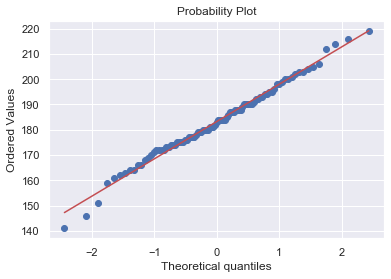

In [22]:
stats.probplot(cars93reduced["Length"], dist="norm", plot=plt);

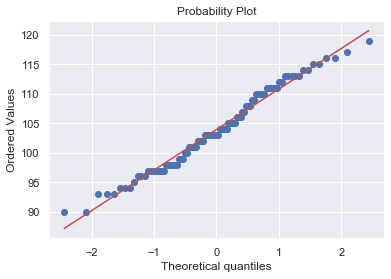

In [23]:
stats.probplot(cars93reduced["Wheelbase"], dist="norm", plot=plt);

The covariance and Pearson correlation of Length and Turn.circle, Wheelbase and Turn.circle are shown below.

In [24]:
cars93reduced["Length"].cov(cars93reduced["Turn.circle"])

34.780621785881266

In [25]:
cars93reduced["Length"].corr(cars93reduced["Turn.circle"],method="pearson")

0.7389545018604418

The covariance and Pearson correlation of Wheelbase and Turn.circle are shown below.

In [26]:
cars93reduced["Wheelbase"].cov(cars93reduced["Turn.circle"])

15.899836372136514

In [27]:
cars93reduced["Wheelbase"].corr(cars93reduced["Turn.circle"],method="pearson")

0.7233244020299519

The correlation values of Length & Turn.circle and Wheelbase & Turn.circle, suggest that the association between these variables is strong (correlation is close to 1).

### Spearman correlation

The Spearman Rho correlation coefficient is a rank based coefficient, where the variables need not be normally distributed. However, it is mandatory for these variables to be either in interval, ordinal or ratio scale. In addition, it is expected that the association between the variables is monotonic.

It is defined as 

![](7.PNG)

The Shapiro-Wilk test with a significance level of 0.05 for Horsepower, RPM, EngineSize and MPG.city is as shown below.

In [28]:
shapiro(cars93reduced["Horsepower"])

(0.9358058571815491, 0.00019156414782628417)

In [29]:
shapiro(cars93reduced["RPM"])

(0.9739203453063965, 0.059240180999040604)

In [30]:
shapiro(cars93reduced["EngineSize"])

(0.9360973238945007, 0.00019901638734154403)

In [31]:
shapiro(cars93reduced["MPG.city"])

(0.8583050966262817, 5.762488086702433e-08)

The p-value here suggests that the data in the underlying population may not be normally distributed (p-value smaller than chosen significance value).

Therefore the association between these variables can be measured using Spearman correlation coefficient.

Rank is assigned by picking a random variable and comparing against other values of that variable in the dataset.

The below code illustrates the assignment of rank for the first 10 values of Horsepower using `rank()` method in Pandas.



In [32]:
first10hp = cars93reduced["Horsepower"].head(10)
first10hp = first10hp.sort_values(ascending=False)
first10hp

4    208
9    200
1    200
7    180
3    172
2    172
8    170
6    170
0    140
5    110
Name: Horsepower, dtype: int64

In [33]:
rankfirst10hp = first10hp.rank()
print(list(rankfirst10hp))  

[10.0, 8.5, 8.5, 7.0, 5.5, 5.5, 3.5, 3.5, 2.0, 1.0]


It can be observed that the highest value gets the highest rank. Here 208 is the highest value, among 10 values, hence it is assigned the highest rank (10.0). If a value is found to be repeating, then it is assigned the average rank. Here 200 occurs at 9th and 8th position and therefore it receives the rank 8.5 which is the average of 9 and 8. Similarly, 172 and 170 receive 5.5 and 3.5 as rank respectively.

The Spearman correlation of Horsepower and MPG.city, RPM and MPG.city, and EngineSize and MPG.city are shown below

In [34]:
cars93reduced["Horsepower"].corr(cars93reduced["MPG.city"],method="spearman")

-0.7893070882303793

In [35]:
cars93reduced["RPM"].corr(cars93reduced["MPG.city"],method="spearman")

0.38964509885135185

In [36]:
cars93reduced["EngineSize"].corr(cars93reduced["MPG.city"],method="spearman")

-0.8212079921743175

> The correlation values suggest that the association between EngineSize and MPG.city is stronger than the association between Horsepower and MPG.city. Here it can be noticed that the strength of the association is attributed to the magnitude of the correlation value and not the sign.

#### Comparing correlation methods on sample dataset
The Pearson and Spearman correlation of RPM & MPG.city is as shown below.

In [37]:
cars93reduced["RPM"].corr(cars93reduced["MPG.city"],method="pearson")

0.36304512864824134

In [38]:
cars93reduced["RPM"].corr(cars93reduced["MPG.city"],method="spearman")

0.38964509885135185

It can be noticed here that the correlation coefficients obtained using Pearson and Spearman for RPM and MPG.city do not differ significantly.

***

### Kendall Tau Correlation

The Kendall Tau correlation coefficient is a rank based coefficient similar to Spearman correlation, where the variables need not be normally distributed. However, it is mandatory for these variables to be either in interval, ordinal or ratio scale. In addition, it is expected that the association between the variables is monotonic. 

It is defined as 

![](8.PNG)

Let (x1, y1), (x2, y2), …, (xn, yn) be a set of observations derived from the two joint random variables X and Y.

In a way that all the values of (xi) and (yi) are to be different.

If both the elements of a particular pair agree(both the elements of the lesser or greater compared to the other pair) then they are called __concordant pairs__. Similarly if the elements of the pair disagree then they are called __discordant__. And they are neither concordant nor discordant if both elements are equal to the other observation.

Computing the number of concordant and discordant pairs for a given data set is as illustrated below.

Ranks of three entries of RPM and MPG.city from the sample dataset is given

In [39]:
first25rpm = np.array(cars93reduced["RPM"].head(25).rank())
first25mpg = np.array(cars93reduced["MPG.city"].head(25).rank())
np.array([first25rpm,first25mpg])[:,19:22]

array([[18. , 12.5,  8.5],
       [14. , 20.5, 14. ]])

Here, the pair of (x1=18.0, y1=14.0) and (x2=12.5, y2=20.5) is discordant because x1 > x2 and y1 < y2. The pair of (x2=12.5, y2=20.5) and (x3=8.5, y3=14.0) is concordant because x2 > x3 and y2 > y3. The pair of (x1=18.0, y1=14.0) and (x3=8.5, y3=14.0) is neither concordant nor discordant because y2 = y3.

The Kendall Tau correlation for these pairs can thus be computed as

![](9.PNG)

The Kendall Tau correlation for these pairs is observed to be 0 as shown below.

In [40]:
rpm_values = pd.DataFrame({"rpm_ranks" : [18.0 , 12.5,  8.5]})
mpg_values = pd.DataFrame({"mpg_ranks" :[14.0 , 20.5, 14.0 ]})
mpg_values["mpg_ranks"].corr(rpm_values["rpm_ranks"], method = "kendall")

0.0

The Kendall Tau correlation coefficient of MPG.city and Horsepower, MPG.city and RPM, MPG.city and EngineSize are shown below.



In [41]:
cars93reduced["Horsepower"].corr(cars93reduced["MPG.city"],method="kendall")

-0.6232924179871033

In [42]:
cars93reduced["RPM"].corr(cars93reduced["MPG.city"],method="kendall")

0.29452246826301876

In [43]:
cars93reduced["EngineSize"].corr(cars93reduced["MPG.city"],method="kendall")

-0.6820807909116785

Kendall coefficient value for a dataset is usually lower than the Spearman coefficient value for the same data set. The relationship between the Kendall Tau coefficient and Spearman Rho coefficient is given by

![](10.PNG)

***

### Correlation Matrix
For multivariate data, the correlation matrix captures the values of correlation between the selected parameters of the data set.

The Pearson correlation matrix of MPG.city, EngineSize, Horsepower and RPM is shown below.

In [44]:
cars93reduced[["MPG.city","EngineSize","Horsepower","RPM"]].corr()

,MPG.city,EngineSize,Horsepower,RPM
MPG.city,1.000000,-0.710003,-0.672636,0.363045
EngineSize,-0.710003,1.000000,0.732120,-0.547898
Horsepower,-0.672636,0.732120,1.000000,0.036688
RPM,0.363045,-0.547898,0.036688,1.000000


![](11.PNG)

***

# Association between categorical variables

## Chi-Squared Test
The design team at ABCarz speculate that DriveTrain may influence the Type of the car.

Since these variables are categorical, covariance and correlation may be inappropriate metrics to determine the existence of an association between them.

Two-way tables are used to examine the relationship between two categorical variables. The two-way table between DriveTrain and Type is shown below.

In [45]:
two_way_table = pd.crosstab(index=cars93reduced["DriveTrain"], columns=cars93reduced["Type"])
two_way_table.index = ["4WD","Front","Rear"]
two_way_table

Type,Compact,Large,Midsize,Small,Sporty,Van
4WD,1,0,0,2,2,5
Front,13,7,17,19,7,4
Rear,2,4,5,0,5,0


The existence of an association can be determined by performing a __Chi-squared test__ on the two-way table.

### Chi-Squared Test

__Chi-squared test__ for independence is used to test if evidence pertaining to the relationship of variables in the sample is strong enough to generalize this relationship for the population.

For the given dataset, the existence of a relationship between DriveTrain and Type of car can be tested using the Chi-squared test as follows.

1. Define the null and the alternate hypothesis:
    - __H0 (Null hypothesis):__ The variables are independent.
    - __H1 (Alternate hypothesis):__ The variables are dependent.

2. Select a level of significance – usually 0.05 or 0.1. For the given dataset, the level of significance is selected as 0.05.
3. Identify the degrees of freedom. This is usually computed as, (no. of rows – 1) × (no. of columns – 1).
4. For the relationship between DriveTrain and Type of car, the degrees of freedom is (3 – 1) × (6 – 1) = 10. Find the critical value for the given significance level and degrees of freedom from the table below

![](12.PNG)

For the significance level of 0.05 and the degrees of freedom as 10, the critical value is traced as 18.31.

5.  Compute the chi-squared statistic 

    $$ \chi^2 = \sum\frac{(O-E)^2}{E}  $$
    
    Where O is observed frequency and E is the expected frequency.

    Using the two way table (under the null hypothesis), E is calculated as
    
    $$ E = \frac{rsxcs}{n}$$
    
    where rs - row sum  
          cs - column sum  
          n- sample size
          
    In the below two way table, the expected frequency E of a compact 4WD car can be computed as
    
    $$E = \frac{160}{93} = 1.72$$
    
    ![](13.PNG)

6.  In order to reject the null hypothesis, the computed chi-squared value should be greater than the identified critical value.

       Here, the computed value is 35.001 which is larger than the critical value 18.31.

       Therefore, the null hypothesis is rejected, i.e. the DriveTrain and Type of a car are not independent. 

__Chi-squared test can be performed using [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html), [chi2.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html) in scipy.stats.__


- __chi2.ppf(q,df)__: A chi continuous random variable's Percent point function (ppf).
- __chi2_contingency__: Calculate a one-way chi-square test. The chi-square test tests the null hypothesis that the categorical data has the given frequencies. This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5. Returns(chisq_statistic, p-value).



In [46]:
from scipy.stats import chi2_contingency,chi2

In [47]:
chi2.ppf(1-0.05, 10)  # Finding the critical value

18.307038053275146

In [48]:
chi2_contingency(two_way_table)

(35.00129365348582,
 0.00012480179759447616,
 10,
 array([[ 1.72043011,  1.1827957 ,  2.3655914 ,  2.25806452,  1.50537634,
          0.96774194],
        [11.52688172,  7.92473118, 15.84946237, 15.12903226, 10.08602151,
          6.48387097],
        [ 2.75268817,  1.89247312,  3.78494624,  3.61290323,  2.40860215,
          1.5483871 ]]))

- The first line indicates the chi-squared value. 
- Second line indicates the p-value.
- Third indicates the degrees of freedom

It can be observed that the computed chi-squared statistic is greater than the critical value, hence the null hypothesis is rejected.

Also, the p-value obtained is lesser than the chosen significance level. This is another indicator which helps determine whether to reject or accept the null hypothesis. If the obtained p-value is lower than the significance level, then the null hypothesis is rejected.

##### Associations between categorical and numeric variable

The below table summarizes the various tests that are used to determine associations between two variables based on their type.

![](14.PNG)

***

## Association between two binary variables

### Phi coefficient

The design team is interested to know if there is any association between the availability of manual transmission in the car and the origin of the car. 

The snap of the data indicating the presence of manual transmission and the origin of the car is shown below. 

In [49]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [50]:
df[["Man.trans.avail","Origin"]].head(10)

,Man.trans.avail,Origin
0,Yes,non-USA
1,Yes,non-USA
2,Yes,non-USA
3,Yes,non-USA
4,Yes,non-USA
5,No,USA
6,No,USA
7,No,USA
8,No,USA
9,No,USA


Here, Man.trans.avail and Origin are binary variables and the existence of the association between binary variables can be determined using the __Phi coefficient__.

![](15.PNG)

#### Relationship with Chi squared

The Phi coefficient is also related to the Chi-squared statistic for a 2x2 contingency table as shown below.

$$ \phi^2 = \frac{\chi^2}{n}  $$

***

[Phi Coefficient (Mean Square Contingency Coefficient)](https://www.statisticshowto.com/phi-coefficient-mean-square-contingency-coefficient/)

Conditions for applying:
- At least one variable is a nominal variable.
- Both variables are dichotomous variables.


> What is a Dichotomous Variable?  
__Dichotomous variables__ are categorical variables with two categories or levels. Levels are different groups within the same independent variable. Eg: Heads or tails, Male or female, rich or poor, etc. Binary variables are a sub-type of dichotomous variable; variables assigned either a 0 or a 1 are said to be in a binary state. For example Male (0) and female (1).

![](16.PNG)

![](17.PNG)

In [51]:
temp = pd.crosstab(df["Man.trans.avail"], df["Origin"])
temp

Origin,USA,non-USA
Man.trans.avail,,
No,26,6
Yes,22,39


Function to calculate association 2 binary values i.e, their phie coefficient

In [52]:
def phi_coefficient(a,b):
    temp = pd.crosstab(a,b)
    return(((temp.iloc[1,1] * temp.iloc[0,0]) - (temp.iloc[0,1]*temp.iloc[1,0]))/
          np.sqrt(np.prod(temp.apply(sum, axis = 'index').to_list()) * np.prod(temp.apply(sum, axis = 'columns').to_list())))


In [53]:
phi_coefficient(df["Man.trans.avail"], df["Origin"])

0.4295382099074444

***

# Market Basket Analysis

## Problem Statement
ABCarz have various showrooms across the city where they sell their cars and various other automobile accessories to customers. The marketing managers of ABCarz are looking to market their products better by analyzing customer buying patterns. Data about the various accessories that are purchased is collected for this analysis.

The data presented here is hypothetical and comprises some attributes as described below.
- BillNumber: This is the Bill number for each customer purchase.
- CustomerName: Name of the Customer.
- ContactNo: Contact number of the customer.
- Items: List of items purchased by the customer. This is a factor with various levels

A snap of the data is shown below.

![](18.PNG)

Of the various attributes in the data set, the analysis that leads to determining purchase behavior of customers arises from the items attribute. The marketing team seeks to study the items attribute more closely to determine associations between various items.

From the given data, they wish to find the items that were purchased most frequently. They also wish to determine the item(s) which encouraged the customer to purchase additional item(s). Such analysis is commonly termed as __Market Basket Analysis__, where the interesting associations between various items are determined.

From the given sample data set, the most frequently purchased item can be determined using a frequency table, as shown below

This table reveals that foot mats are the most frequently purchased item.

![](19.PNG)


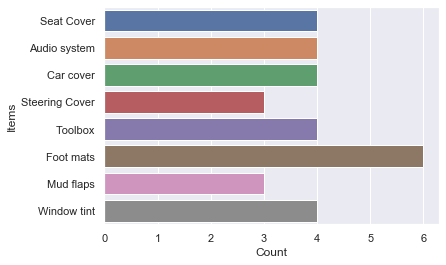

In [54]:
df = pd.read_excel("marketbasket-caraccessories.xlsx")
df = df.replace(float("nan"), 0)
df = df.replace("y", 1)
df = pd.DataFrame({"Items":list(df.columns),
                   "Count":list(df.sum(axis=0))
                  })
bar = sns.barplot(data = df,y="Items",x="Count")

In [55]:
df.head()

,Items,Count
0,Seat Cover,4
1,Audio system,4
2,Car cover,4
3,Steering Cover,3
4,Toolbox,4


### Analyzing the data

The team seeks to determine the purchase behavior wherein the purchase of foot mat was accompanied by the purchase of which other items. For example, the team seeks to determine the no. of transactions wherein the purchase of foot mats is accompanied by the purchase of seat cover. The team also seeks to determine the no. of transactions where the purchase of foot mats is accompanied by the purchase of mud flaps.

From the frequency table, it can be observed that seat covers and foot mats were purchased together in 3 transactions. Also, mud flaps and foot mats were purchased together in 1 transaction alone.

These associations can be represented as association rules which are specified as follows:

1. Foot mats → Seat cover: Customers who bought Foot mats also bought seat cover.
2. Foot mats → Mud flaps: Customers who bought Foot mats also bought mud flaps.

In order to determine if these association rules are interesting, measures such as support & confidence can be used.

### Support and Confidence

Support and confidence indicate how interesting an association rule is. 

__Support__ indicates the usefulness of the rule, while __confidence__ indicates the certainty of the rule. 

> For a given association rule x → y, __support__ indicates the fraction of transactions that contain both x and y. 

> The __confidence__ indicates the fraction of transactions that contain both x and y among the transactions that contain x.

![](20.PNG)


A confidence of 0.5 here indicates that 50% of customers who purchased foot mats also purchased seat cover.

Similarly, the support and confidence for the association between foot mats and mud flaps are 1/15 and 1/6 respectively. 

Support and confidence can also be expressed in terms of probability as shown below.

![](21.PNG)

An association rule can be said to be sufficiently useful by interpreting its support and confidence. __Typically, the obtained value of support is compared against a chosen threshold to signify that the association rule must be observed in at least a significant number of transactions.__

For example, if the chosen support threshold is 0.1 then the association rule is expected to hold true for at least 10% of the transactions. The choice of this threshold is based on domain and the total number of transactions being studied.

Typically an association rule is said to be interesting if:     

>  Support  ≥ minsupport threshold 

> Confidence ≥ min_confidence threshold 


__The choice of min_support threshold and min_confidence threshold is purely based on domain knowledge.__

If the min_support threshold and min_confidence threshold for this sample study are considered as 0.1 and 0.4 respectively, then the association between foot mats and seat cover can be said to be interesting because the support and confidence for this association are 0.2 and 0.5 respectively.

It is also possible that customers buy a set of items together. For example, in the given sample dataset, customers who purchased both audio system and toolbox also purchased window tint.

__The support-confidence for the association between {audio system, toolbox} and {window tint} expressed as {audio system, toolbox} → {window tint} is as follows.__

![](22.PNG)

This is also an interesting association because the computed support and confidence are greater than the chosen thresholds.


> Support and confidence can take values in range of [0,1].

***

### Inadequacy of support-confidence

#### Lift
Consider the below scenario for the given sample data where the usefulness of the association rule {audio system, toolbox} → {window tint} is being determined using support and confidence.

![](23.PNG)

Based on the above two-way table, it can be observed that for an association between x and y, represented as association rule x → y, confidence considers only x and the co-occurrence of x.

> To determine whether the association rules discovered are sufficiently interesting enough, additional metrics such as lift, conviction and leverage can be used.

![](24.PNG)

Larger values of lift indicate stronger association because lift indicates the strength of association. The nature of association based on the value of lift can be summarized as below:

- If lift = 1, then x and y are said to be disassociated/statistically independent. The presence of x may have no influence on the presence of y.
- If lift > 1, then x and y are said to be positively associated i.e. the presence of x tends to indicate the presence of y.
- If lift < 1, then x and y are said to be negatively associated.

